In [3]:
import pandas as pd
df = pd.read_excel('C:/Users/Administrator/Desktop/基于链家网的房价影响因素分析及预测/数据/三亚链家二手房房源信息采集.xlsx')
df.head()

,链家编号,总价,均价,房型,楼层,朝向,装修,面积,建筑类型,小区名称,所在区域
0,105103556965,400.0,40672元/平米,2室2厅,中楼层,南,其他,98.35平米,板塔结合,阳光海岸,天涯 天涯
1,105103632030,490.0,38865元/平米,2室2厅,中楼层,东南,其他,126.08平米,板楼,三亚丽禾温德姆产权酒店,天涯 天涯
2,105103495381,520.0,52637元/平米,2室1厅,高楼层,西,其他,98.79平米,板塔结合,蓝色海岸,天涯 天涯
3,105102058432,850.0,52254元/平米,4室2厅,低楼层,东,简装,162.67平米,暂无数据,鲁能三亚湾高尔夫一区,天涯 天涯
4,105101245081,170.0,19775元/平米,2室1厅,中楼层,南,简装,85.97平米,暂无数据,申联大厦,天涯 天涯


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 11 columns):
链家编号    1064 non-null int64
总价      1064 non-null float64
均价      1064 non-null object
房型      1064 non-null object
楼层      1064 non-null object
朝向      1064 non-null object
装修      1064 non-null object
面积      1064 non-null object
建筑类型    1064 non-null object
小区名称    1064 non-null object
所在区域    1064 non-null object
dtypes: float64(1), int64(1), object(9)
memory usage: 91.5+ KB


In [5]:
#删除链家编号列
del df["链家编号"]
df.head()

,总价,均价,房型,楼层,朝向,装修,面积,建筑类型,小区名称,所在区域
0,400.0,40672元/平米,2室2厅,中楼层,南,其他,98.35平米,板塔结合,阳光海岸,天涯 天涯
1,490.0,38865元/平米,2室2厅,中楼层,东南,其他,126.08平米,板楼,三亚丽禾温德姆产权酒店,天涯 天涯
2,520.0,52637元/平米,2室1厅,高楼层,西,其他,98.79平米,板塔结合,蓝色海岸,天涯 天涯
3,850.0,52254元/平米,4室2厅,低楼层,东,简装,162.67平米,暂无数据,鲁能三亚湾高尔夫一区,天涯 天涯
4,170.0,19775元/平米,2室1厅,中楼层,南,简装,85.97平米,暂无数据,申联大厦,天涯 天涯


In [6]:
#数据处理，抽取室、厅
df[["室","厅"]] = df["房型"].str.extract("(\d+)室(\d+)厅")


D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


In [7]:
import numpy as np

In [8]:
#string类型转换成float类型
df["室"] = df["室"].astype(float)
df["厅"] = df["厅"].astype(float)
df.head()

,总价,均价,房型,楼层,朝向,装修,面积,建筑类型,小区名称,所在区域,室,厅
0,400.0,40672元/平米,2室2厅,中楼层,南,其他,98.35平米,板塔结合,阳光海岸,天涯 天涯,2.0,2.0
1,490.0,38865元/平米,2室2厅,中楼层,东南,其他,126.08平米,板楼,三亚丽禾温德姆产权酒店,天涯 天涯,2.0,2.0
2,520.0,52637元/平米,2室1厅,高楼层,西,其他,98.79平米,板塔结合,蓝色海岸,天涯 天涯,2.0,1.0
3,850.0,52254元/平米,4室2厅,低楼层,东,简装,162.67平米,暂无数据,鲁能三亚湾高尔夫一区,天涯 天涯,4.0,2.0
4,170.0,19775元/平米,2室1厅,中楼层,南,简装,85.97平米,暂无数据,申联大厦,天涯 天涯,2.0,1.0


In [9]:
#建筑面积，去除平米
#map遍历面积中的值
#使用lambda表达式替换为空值
df["面积"] = df["面积"].map(lambda e: e.replace("平米",""))

In [10]:
#面积数值类型转换为float
df["面积"] = df["面积"].astype(float)
df.head()

,总价,均价,房型,楼层,朝向,装修,面积,建筑类型,小区名称,所在区域,室,厅
0,400.0,40672元/平米,2室2厅,中楼层,南,其他,98.35,板塔结合,阳光海岸,天涯 天涯,2.0,2.0
1,490.0,38865元/平米,2室2厅,中楼层,东南,其他,126.08,板楼,三亚丽禾温德姆产权酒店,天涯 天涯,2.0,2.0
2,520.0,52637元/平米,2室1厅,高楼层,西,其他,98.79,板塔结合,蓝色海岸,天涯 天涯,2.0,1.0
3,850.0,52254元/平米,4室2厅,低楼层,东,简装,162.67,暂无数据,鲁能三亚湾高尔夫一区,天涯 天涯,4.0,2.0
4,170.0,19775元/平米,2室1厅,中楼层,南,简装,85.97,暂无数据,申联大厦,天涯 天涯,2.0,1.0


In [11]:
#总价数值类型转换为float
df["总价"] = df["总价"].astype(float)
df.head()

,总价,均价,房型,楼层,朝向,装修,面积,建筑类型,小区名称,所在区域,室,厅
0,400.0,40672元/平米,2室2厅,中楼层,南,其他,98.35,板塔结合,阳光海岸,天涯 天涯,2.0,2.0
1,490.0,38865元/平米,2室2厅,中楼层,东南,其他,126.08,板楼,三亚丽禾温德姆产权酒店,天涯 天涯,2.0,2.0
2,520.0,52637元/平米,2室1厅,高楼层,西,其他,98.79,板塔结合,蓝色海岸,天涯 天涯,2.0,1.0
3,850.0,52254元/平米,4室2厅,低楼层,东,简装,162.67,暂无数据,鲁能三亚湾高尔夫一区,天涯 天涯,4.0,2.0
4,170.0,19775元/平米,2室1厅,中楼层,南,简装,85.97,暂无数据,申联大厦,天涯 天涯,2.0,1.0


In [12]:
#均价去除元/平米
df["均价"] = df["均价"].map(lambda e: e.replace("元/平米",""))

In [13]:
#转换类型为float
df["均价"] = df["均价"].astype(float)
df.head()

,总价,均价,房型,楼层,朝向,装修,面积,建筑类型,小区名称,所在区域,室,厅
0,400.0,40672.0,2室2厅,中楼层,南,其他,98.35,板塔结合,阳光海岸,天涯 天涯,2.0,2.0
1,490.0,38865.0,2室2厅,中楼层,东南,其他,126.08,板楼,三亚丽禾温德姆产权酒店,天涯 天涯,2.0,2.0
2,520.0,52637.0,2室1厅,高楼层,西,其他,98.79,板塔结合,蓝色海岸,天涯 天涯,2.0,1.0
3,850.0,52254.0,4室2厅,低楼层,东,简装,162.67,暂无数据,鲁能三亚湾高尔夫一区,天涯 天涯,4.0,2.0
4,170.0,19775.0,2室1厅,中楼层,南,简装,85.97,暂无数据,申联大厦,天涯 天涯,2.0,1.0


In [14]:
#字符型属性变成可量化的数值类型
#朝向取出dummy_virable编码
df_decoration = pd.get_dummies(df["朝向"])
print(type(df_decoration))
df_decoration.head()

<class 'pandas.core.frame.DataFrame'>


,东,东北,东南,北,南,西,西北,西南
0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0


In [15]:
#装修取出dummy_virable编码
df_direction = pd.get_dummies(df["装修"])
df_direction.head()

,Loft/其他,其他,平层/其他,平层/简装,平层/精装,毛坯,简装,精装
0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0


In [16]:
#楼层取出dummy_virable编码
df_floor = pd.get_dummies(df["楼层"])
df_floor.head()

,中楼层,低楼层,共2层,双拼,高楼层
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,0,0,1
3,0,1,0,0,0
4,1,0,0,0,0


In [17]:
#因房型，装修，朝向，楼层已经提取，且建筑类型，小区名称，所在区域对分析并无帮助，所以删掉
del df["房型"]
del df["楼层"]
del df["装修"]
del df["朝向"]
del df["小区名称"]
del df["所在区域"]
del df["建筑类型"]
df.head()

,总价,均价,面积,室,厅
0,400.0,40672.0,98.35,2.0,2.0
1,490.0,38865.0,126.08,2.0,2.0
2,520.0,52637.0,98.79,2.0,1.0
3,850.0,52254.0,162.67,4.0,2.0
4,170.0,19775.0,85.97,2.0,1.0


In [18]:
#将朝向，装修，楼层的dummy variable 拼接到df
#concat取正拼接方法
#axis=1水平拼接
df = pd.concat([df,df_decoration,df_direction,df_floor],axis=1)

In [19]:
df.head()

,总价,均价,面积,室,厅,东,东北,东南,北,南,...,平层/简装,平层/精装,毛坯,简装,精装,中楼层,低楼层,共2层,双拼,高楼层
0,400.0,40672.0,98.35,2.0,2.0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,490.0,38865.0,126.08,2.0,2.0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,520.0,52637.0,98.79,2.0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,850.0,52254.0,162.67,4.0,2.0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,170.0,19775.0,85.97,2.0,1.0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0


In [20]:
#删除逻辑错误的数据，及多重共线性的数据
del df["Loft/其他"]
del df["其他"]
del df["平层/其他"]
del df["平层/简装"]
del df["平层/精装"]
del df["共2层"]
del df["双拼"]
del df["中楼层"]

In [21]:
df.head()

,总价,均价,面积,室,厅,东,东北,东南,北,南,西,西北,西南,毛坯,简装,精装,低楼层,高楼层
0,400.0,40672.0,98.35,2.0,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,490.0,38865.0,126.08,2.0,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,520.0,52637.0,98.79,2.0,1.0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,850.0,52254.0,162.67,4.0,2.0,1,0,0,0,0,0,0,0,0,1,0,1,0
4,170.0,19775.0,85.97,2.0,1.0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [22]:
#删除空缺值
df.dropna(how='any',inplace=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064 entries, 0 to 1063
Data columns (total 18 columns):
总价     1064 non-null float64
均价     1064 non-null float64
面积     1064 non-null float64
室      1064 non-null float64
厅      1064 non-null float64
东      1064 non-null uint8
东北     1064 non-null uint8
东南     1064 non-null uint8
北      1064 non-null uint8
南      1064 non-null uint8
西      1064 non-null uint8
西北     1064 non-null uint8
西南     1064 non-null uint8
毛坯     1064 non-null uint8
简装     1064 non-null uint8
精装     1064 non-null uint8
低楼层    1064 non-null uint8
高楼层    1064 non-null uint8
dtypes: float64(5), uint8(13)
memory usage: 63.4 KB


,总价,均价,面积,室,厅,东,东北,东南,北,南,西,西北,西南,毛坯,简装,精装,低楼层,高楼层
0,400.0,40672.0,98.35,2.0,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,490.0,38865.0,126.08,2.0,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,520.0,52637.0,98.79,2.0,1.0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,850.0,52254.0,162.67,4.0,2.0,1,0,0,0,0,0,0,0,0,1,0,1,0
4,170.0,19775.0,85.97,2.0,1.0,0,0,0,0,1,0,0,0,0,1,0,0,0


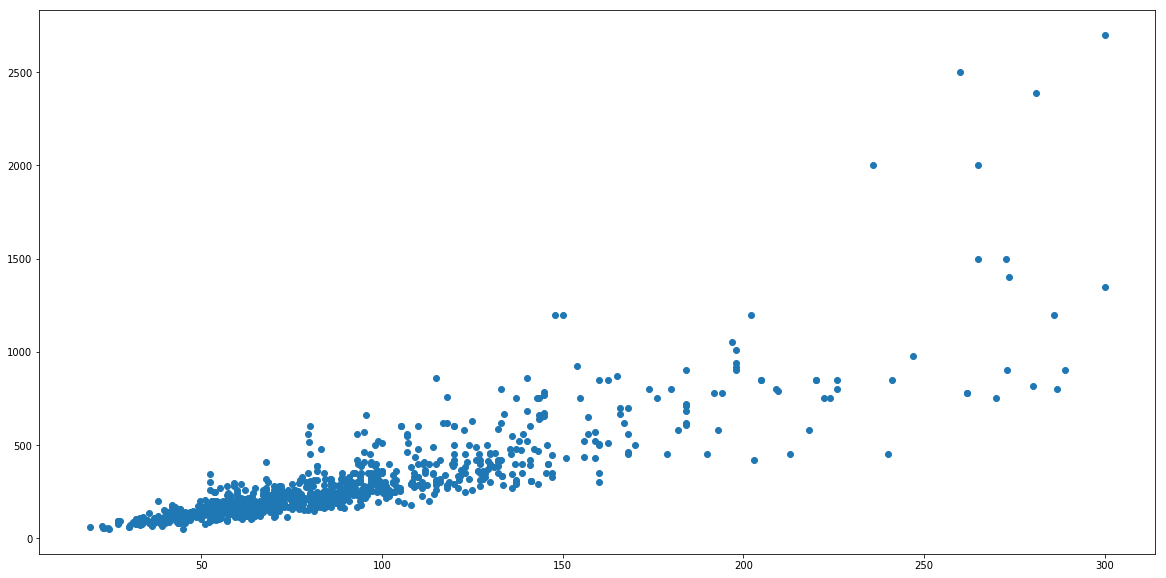

In [23]:
#绘制面积与总价散点图
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
df1 = df[df["面积"]<=300]#筛选出面积小于300
#print(df1.count())#过滤之后df1数量
area = df1["面积"]
price = df1["总价"]
plt.scatter(area,price)
plt.show()

In [24]:
#使用线性回归拟合
from sklearn.linear_model import LinearRegression
linear = LinearRegression()#实例化LinearRegression
#使用fit方法填充数据进行训练
cols = ["面积"]
cols1 = ["总价"]
M = df1[cols]
N = df1[cols1]
model = linear.fit(M,N)
print(model.intercept_,model.coef_)#得到模型的截距和回归系数

[-107.14067387] [[ 4.50194225]]


In [25]:
#预测
N_ = model.predict(M)
print(list(N_))

[array([ 335.62534669]), array([ 460.46420535]), array([ 337.60620128]), array([ 625.19027238]), array([ 279.8913016]), array([ 122.14324506]), array([ 267.60099925]), array([ 258.10190109]), array([ 182.69436836]), array([ 449.20934972]), array([ 293.53218662]), array([ 180.98363031]), array([ 235.00693734]), array([ 52.6782761]), array([ 446.59822322]), array([ 247.02712315]), array([ 320.54384014]), array([ 374.56714717]), array([ 221.50111058]), array([ 86.442843]), array([ 437.45928044]), array([ 253.01470635]), array([ 253.01470635]), array([ 624.51498104]), array([ 608.35300835]), array([ 640.18174008]), array([ 253.01470635]), array([ 365.8333792]), array([ 635.67979783]), array([ 346.74514405]), array([ 1072.36819634]), array([ 901.29439074]), array([ 313.16065485]), array([ 136.90961565]), array([ 978.27760326]), array([ 297.98910945]), array([ 388.07297393]), array([ 910.29827524]), array([ 883.28662173]), array([ 430.43625053]), array([ 297.62895407]), array([ 410.89782115]

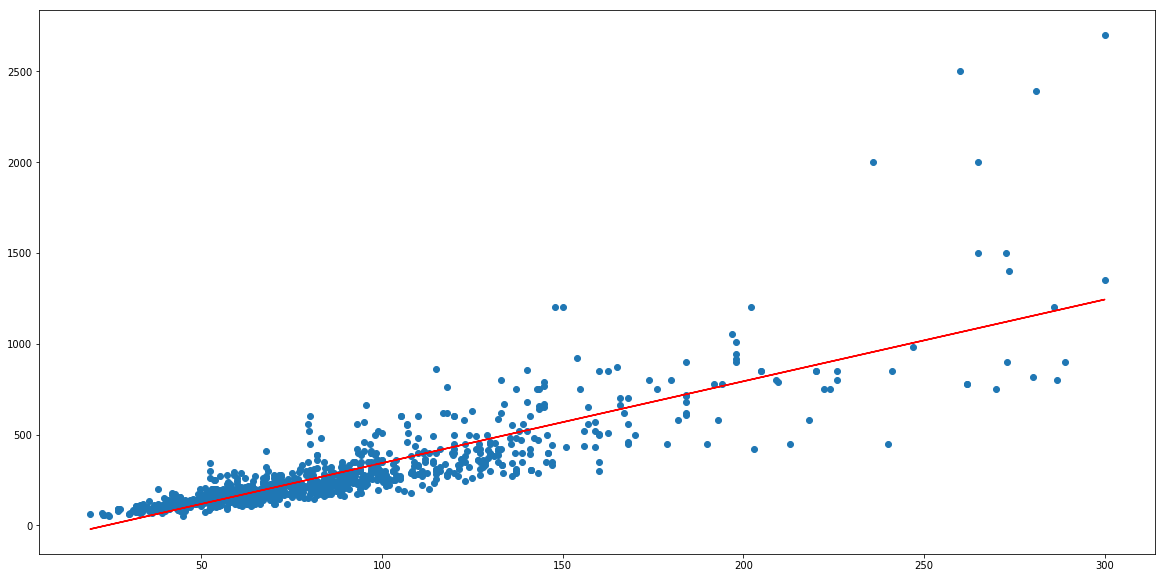

In [26]:
#将预测的房价和原始数据的散点图绘制在一张图上
#绘制建筑面积和总价的散点图
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
area = df1["面积"]
price = df1["总价"]
plt.scatter(area,price)
plt.plot(area,N_,color="red")
plt.show()

In [27]:
#多元线性回归对房价进行预测
cols = ["面积","室","厅","东","东北","东南","北","南","西","西北","西南","毛坯","简装","精装","低楼层","高楼层"]

In [28]:
X = df1[cols]
X.head()

,面积,室,厅,东,东北,东南,北,南,西,西北,西南,毛坯,简装,精装,低楼层,高楼层
0,98.35,2.0,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,126.08,2.0,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,98.79,2.0,1.0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,162.67,4.0,2.0,1,0,0,0,0,0,0,0,0,1,0,1,0
4,85.97,2.0,1.0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [29]:
Y = df1["总价"]
Y.head()

0    400.0
1    490.0
2    520.0
3    850.0
4    170.0
Name: 总价, dtype: float64

In [30]:
#划分训练集和测试集
from sklearn.cross_validation import train_test_split#使用交叉验证，train_test_split对数据集进行划分
#test测试值占比为20%，随机分配123
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=123)
print(x_train.count(),x_test.count())

面积     842
室      842
厅      842
东      842
东北     842
东南     842
北      842
南      842
西      842
西北     842
西南     842
毛坯     842
简装     842
精装     842
低楼层    842
高楼层    842
dtype: int64 面积     211
室      211
厅      211
东      211
东北     211
东南     211
北      211
南      211
西      211
西北     211
西南     211
毛坯     211
简装     211
精装     211
低楼层    211
高楼层    211
dtype: int64


D:\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [31]:
print(len(y_train),len(y_test))

842 211


In [32]:
#多元线性回归
#from sklearn.linear_model import LinearRegression
linear_multi = LinearRegression()
model = linear_multi.fit(x_train,y_train)
print(model.intercept_,model.coef_)

-108.01210344 [  4.6830755    8.61647058 -28.02153638 -10.16732636 -18.8990525
  17.30993133  19.75465542   6.61109854 -11.83846448   6.15562009
  -8.92646204 -44.86010474   6.2922621   51.43936342 -14.30562394
  -3.1803468 ]


In [33]:
#多元线性回归的截距和回归系数
#使用模型的predict方法进行预测
predict_result = model.predict(x_test)
#度量模型的性能，使用score方法，计算出回归算法性能
score = model.score(x_test,y_test)
print('R-scores:',score)

R-scores: 0.744430524713


In [34]:
print((predict_result))

[  230.78171603   326.35056304   222.56680462   488.82873711   203.22200518
    34.27620174    67.94276127   158.1474799    239.551028     137.59304651
   251.99230404   188.60351603   192.13339058   235.56215056   243.80105424
   129.14406318   276.58258272   169.21129605   805.79114618   287.14370134
   185.31790934   119.32240103   125.19038638   242.28120452   142.07637759
   243.24734833   173.39459375    70.42479128    12.68792248   313.50332865
   577.55762926   108.33131459    60.09563698   262.71180916   427.024
   852.6042367    270.89381769    69.74375061   450.60942439   450.93266044
   166.73890934   184.84613791   182.60567778    55.78818563   309.28069976
   182.84415618    60.59489001   149.14449318    30.47815729   156.57166796
    77.15897272   154.48930575   343.47832147    51.05392995   219.3795989
   422.43650436   777.92379776   744.3385708    243.72413764   796.99033212
   337.20616673   280.44573684   427.94372731   121.0044562    395.16219883
   181.59478794   

In [40]:
#使用假设检验法，选出最相关的的特征，用于预测
cols = ["面积","室","厅","东","东北","东南","北","南","西","西北","西南","毛坯","简装","精装","低楼层","高楼层"]
import statsmodels.api as sm
X = df1[["面积","室","厅","东","东北","东南","北","南","西","西北","西南","毛坯","简装","精装","低楼层","高楼层"]]
Y = df1["总价"].values
#调用sm上面的add_constant方法将X训练值增加为一个常量赋值为X_
X_ = sm.add_constant(X)
#使用最小平方法(计算出模型中度量模型性能的参数)
#Y因变量，X_自变量
result = sm.OLS(Y,X_)
#fit方法进行计算
summary = result.fit()
#调用summary2方法，打印出假设检验的系列信息
print(summary.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.715     
Dependent Variable: y                AIC:                13240.9383
Date:               2020-03-12 15:15 BIC:                13320.2887
No. Observations:   1053             Log-Likelihood:     -6604.5   
Df Model:           15               F-statistic:        177.2     
Df Residuals:       1037             Prob (F-statistic): 2.17e-273 
R-squared:          0.719            Scale:              16673.    
---------------------------------------------------------------------
         Coef.     Std.Err.      t      P>|t|      [0.025     0.975] 
---------------------------------------------------------------------
const   -93.4766     9.9756   -9.3705   0.0000   -113.0512   -73.9019
面积        4.5419     0.1590   28.5654   0.0000      4.2299     4.8539
室        14.4644     7.1609    2.0199   0.0436      0.4129    28.5159
厅       -27.9330     7.4539   -3.7474   0.0002    -42.

In [41]:
import itertools
#使用AIC，找出AIC最小的属性作为预测的特征属性
#寻找最小AIC的属性组合
fileds = ["面积","室","厅","东","东北","东南","北","南","西","西北","西南","毛坯","简装","精装","低楼层","高楼层"]
acis = {}
for i in range(1,len(fileds)+1):
    for virables in itertools.combinations(fileds,i):
        x1 = sm.add_constant(df1[list(virables)])
        x2 = sm.OLS(Y,x1)
        res = x2.fit()
        acis[virables] = res.aic

In [42]:
#使用collection里面的Counter，对字典进行统计
from collections import Counter
counter = Counter(acis)
#倒叙取出最后10个特征组合
counter.most_common()[::-10]

[(('面积', '室', '厅', '精装', '低楼层'), 13225.867878569572),
 (('面积', '室', '厅', '东北', '精装'), 13227.465483824495),
 (('面积', '室', '厅', '精装', '低楼层', '高楼层'), 13227.866213184814),
 (('面积', '室', '厅', '西', '精装'), 13228.180603537599),
 (('面积', '室', '厅', '东南', '北', '精装'), 13228.486582212443),
 (('面积', '室', '厅', '东', '西北', '精装', '低楼层'), 13228.590030553638),
 (('面积', '室', '厅', '东北', '精装', '低楼层', '高楼层'), 13228.736134470244),
 (('面积', '室', '厅', '东北', '北', '精装'), 13228.860633143931),
 (('面积', '室', '厅', '北', '简装', '精装', '低楼层'), 13229.001227083769),
 (('面积', '室', '厅', '东北', '毛坯', '精装'), 13229.137290537381),
 (('面积', '室', '厅', '西', '西南', '精装', '低楼层'), 13229.27240687743),
 (('面积', '室', '厅', '东', '东北', '西北', '精装', '低楼层'), 13229.341882762305),
 (('面积', '室', '厅', '东', '简装', '精装'), 13229.399555894894),
 (('面积', '室', '厅', '东南', '南', '精装'), 13229.462143949313),
 (('面积', '厅', '西', '精装'), 13229.530101093123),
 (('面积', '厅', '东北', '北', '精装', '低楼层'), 13229.613896822437),
 (('面积', '室', '厅', '东北', '北', '毛坯', '精装', '低楼层'), 

In [43]:
#        '面积', '室', '厅', '精装', '低楼层'
cols2 = ['面积', '室', '厅', '精装', '低楼层']
#划分测试集和训练集
X = df1[cols2]
Y = df1['总价']
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=123)
#多元线性回归
linear_multi = LinearRegression()
model1 = linear_multi.fit(x_train,y_train)
#model1的截距以及回归系数
print(model1.intercept_,model.coef_)
print(model1.score(x_test,y_test))

-103.531318315 [  4.6830755    8.61647058 -28.02153638 -10.16732636 -18.8990525
  17.30993133  19.75465542   6.61109854 -11.83846448   6.15562009
  -8.92646204 -44.86010474   6.2922621   51.43936342 -14.30562394
  -3.1803468 ]
0.751269936315


In [45]:
#使用模型的predict方法进行预测
predict_result = model1.predict(x_test)
print(list(predict_result))

[228.39890267023179, 328.22924817075312, 220.66985732747975, 512.06773227721033, 201.86864016413591, 15.448499469482897, 69.245438042227846, 156.90759377268284, 257.02189215903667, 138.30989706062758, 242.64536405479112, 178.74572935077333, 190.40101061840659, 216.73085621215262, 241.55226462326198, 145.83218029037531, 274.40210884773654, 170.45315900388113, 793.88550682011555, 287.79346476901821, 172.95708909378328, 126.49770054682747, 126.34051104530101, 232.49509328708535, 129.31340148035386, 261.41670361163375, 186.88106130772826, 71.732640533509482, 31.779564883935961, 330.09295786319711, 561.88886231359618, 109.44630544414264, 61.110106085272946, 280.50279420371038, 414.32902098075795, 854.59736602326109, 271.61660866448176, 60.329051752727622, 451.87170009444321, 441.30951825833904, 167.93543261855751, 172.80255664009627, 166.70187128412243, 46.344403782879851, 322.73830820660623, 180.78037595175442, 48.43945188440415, 165.29039433820867, 31.702758928542636, 146.75401966959697, 